In [305]:
#Next steps -  
#Go through the Instructor Day 2 excertize and visualize your results https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-06-2020-u-c/blob/master/DataViz-Content/21-Machine-Learning/2/Activities/07-Ins_SVM/Solved/Ins_Support_Vector_Machine.ipynb
#4 - time to visualize. A few questions to consider: 
#Qa - what trends exist with movies that have actually scored 7.5 avg rating
#Qb - what % of future movies are expected to have a 7.5+ rating 
#Qc - how does the % of future movies with a 7.5+ rating compare to the past? 
#Qd - what are key features of 7.5 internatinal movies compared to 7.5 US movies? 
#Conclusion - as a movie executive, these are the features most likily to score well with viewers
#Bonus - what's was revenue of recent releases with the top 5 highest average vote scores?

In [303]:
import pandas as pd
import requests
import json
from pprint import pprint
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [227]:
a = pd.read_csv("a.csv")
a.columns
df = a[['id','title','popularity','vote_count','vote_average','original_language','release_date']]
df

,id,title,popularity,vote_count,vote_average,original_language,release_date
0,531219,Roald Dahl's The Witches,1497.123,698,6.9,en,2020-10-26
1,718444,Rogue,562.083,354,5.8,en,2020-08-20
2,594718,Sputnik,475.982,50,6.4,ru,2020-09-10
3,531499,The Tax Collector,444.615,179,6.0,en,2020-08-07
4,425001,The War with Grandpa,347.616,121,6.0,en,2020-08-27
...,...,...,...,...,...,...,...
195,741032,Danyka,6.292,0,0.0,en,2020-11-26
196,653756,The Mole Agent,4.199,0,0.0,es,2020-12-11
197,660330,Night Shift,5.035,34,6.3,fr,2020-05-21
198,745589,Villa caprice,4.251,0,0.0,fr,2020-11-25


In [118]:
#clearn your data so that all your features are categorical or numerical
#feature a: popularity is fine as is
#feature b: release data needs to be in categorical form by month 
#feature c: original language is fine as is 

In [213]:
#make release_data categorical. Parse by year, month, day then drop year
# new_releases_df['release_month'] = 
# df['year'] = pd.DatetimeIndex(df['release_date']).year
# df['r_month'] = pd.DatetimeIndex(df['release_date']).month
# df['r_day'] = pd.DatetimeIndex(df['release_date']).day
# df2 = df[['id','title','popularity','vote_count','vote_average','origional_language','release_date','r_year','r_month','r_day']]
# final_data_clean2 .head(3)

In [ ]:
#create a csv for movies that haven't been released

In [233]:
#seperate your dataset into movies out and soon to be released movies 
movies_to_predict = df[(df['vote_count'] == 0)]
train_model_movies = df[(df['vote_count'] > 0)]
movies_to_predict.to_csv("a_movies_to_predict.csv")
train_model_movies.to_csv("a_train_model_movies.csv")

In [ ]:
# MODELING TIME

In [234]:
#Step 01 - import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

#Step 02 - Look at the shape of the dataframe
train_model_movies.shape

(98, 7)

In [41]:
#input variables are: popularity, vote_count, original language (en: 1; non-en: 0)
#ouput variable: is this true? "yes" - vote_average is > 5.0 for future movies 

In [235]:
#Create two bins for vote_average: above and at/below average
#first let's look at the distribution of vote_averages
train_model_movies['vote_average'].unique()

array([6.9, 5.8, 6.4, 6. , 6.6, 5.5, 6.3, 7.1, 6.7, 5.7, 6.8, 7.9, 6.5,
       7.5, 7.8, 4.4, 4.3, 6.1, 5.9, 7.2, 7. , 6.2, 4.7, 8.5, 8.1, 4.9,
       8. , 7.6, 1. , 5.1, 8.7, 7.7, 4.5, 3.8, 5.6, 7.4, 5.4])

In [280]:
#next let's group into either "above_avg" (5.0+) or "not" (>=5.0)
train_model_movies['avg_vote_6+'] = np.where((train_model_movies['vote_average']>=6), 1, 0)
train_model_movies.tail(3)
train_model_movies['en = lang'] = np.where((train_model_movies['original_language']>='en'), 1, 0)
train_model_movies
train_model_movies2 = train_model_movies.drop(['avg_vote_7.5+'], axis=1)
train_model_movies2.drop(['avg_vote_5+'], axis=1)
train_model_movies3 = train_model_movies2.drop(['en as original lang'], axis=1)
train_model_movies4 = train_model_movies3.drop(['avg_vote_5+'], axis=1)
train_model_movies4
train_model_movies4['release_month']= pd.DatetimeIndex(train_model_movies4['release_date']).month
train_model_movies4['release_day']= pd.DatetimeIndex(train_model_movies4['release_date']).day
train_model_movies4['release_year']= pd.DatetimeIndex(train_model_movies4['release_date']).year
train_model_movies4

<ipython-input-280-ca98b1f268c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_model_movies['avg_vote_6+'] = np.where((train_model_movies['vote_average']>=6), 1, 0)
<ipython-input-280-ca98b1f268c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_model_movies['en = lang'] = np.where((train_model_movies['original_language']>='en'), 1, 0)


,id,title,popularity,vote_count,vote_average,original_language,release_date,avg_vote_6+,en = lang,release_month,release_day,release_year
0,531219,Roald Dahl's The Witches,1497.123,698,6.9,en,2020-10-26,1,1,10,26,2020
1,718444,Rogue,562.083,354,5.8,en,2020-08-20,0,1,8,20,2020
2,594718,Sputnik,475.982,50,6.4,ru,2020-09-10,1,1,9,10,2020
3,531499,The Tax Collector,444.615,179,6.0,en,2020-08-07,1,1,8,7,2020
4,425001,The War with Grandpa,347.616,121,6.0,en,2020-08-27,1,1,8,27,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
188,424201,Burden,6.429,13,6.0,en,2020-02-28,1,1,2,28,2020
190,744738,Dune Drifter,5.837,4,5.4,en,2020-10-24,0,1,10,24,2020
193,613319,Selfie,4.927,48,5.6,fr,2020-01-15,0,1,1,15,2020
197,660330,Night Shift,5.035,34,6.3,fr,2020-05-21,1,1,5,21,2020


In [281]:
train_model_movies4['avg_vote_6+'].value_counts()

1    76
0    22
Name: avg_vote_6+, dtype: int64

In [284]:
#Step 03 - Define the features of the target
X = train_model_movies4[['popularity','vote_count','vote_average','en = lang','release_month','release_day','release_year']]
y = train_model_movies4[['avg_vote_6+']]

In [285]:
#Split the dataset in to test and train using sklearn before building the SVM 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [291]:
#define the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [293]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
y_predict = svclassifier.predict(X_test)

In [294]:
#print the accuracy of the model 
print('Test Acc: %.3f' % model.score(X_test, y_test)) 

Test Acc: 0.880


In [296]:
#calculated the classified report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[ 7  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.94      0.88      0.91        17

    accuracy                           0.88        25
   macro avg       0.86      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



In [ ]:
#With the classification report we confirm that the model was able to identify movies with a 6+ average score 88% of the time.
#With an F1 score of 0.91, we confirm that our model has a very high level of accuracy at predicting a positive outcome

In [297]:
#refrence: https://intellipaat.com/blog/tutorial/machine-learning-tutorial/svm-algorithm-in-python/

/Users/jennieleegruber/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


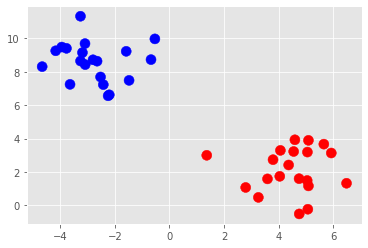

In [304]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()